# A Guide to Machine Learning Evaluation Metrics

This notebook provides a comprehensive guide to evaluation metrics in Machine Learning, specifically designed for university-level machine learning classes. It covers classification and regression metrics. For each metric, we will:
1. **Define** the metric.
2. **Discuss** its advantages and disadvantages.
3. **Train a model** specifically to demonstrate that metric.
4. **Visualize** the results (including ROC curves, Confusion Matrices, etc.).
5. **Compare** all metrics at the end using a single dataset.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, roc_curve, 
    log_loss, mean_absolute_error, mean_squared_error, r2_score
)

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Part 1: Classification Metrics

We will use an imbalanced dataset to highlight the differences between these metrics.

In [11]:
# Generate an imbalanced dataset (90% negative, 10% positive)
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Train a standard Logistic Regression model
clf_model = LogisticRegression()
clf_model.fit(X_train_c, y_train_c)
y_pred_c = clf_model.predict(X_test_c)
y_prob_c = clf_model.predict_proba(X_test_c)[:, 1]

print("Train size: ", len(y_train_c))
print("Train size: ", len(y_test_c))

Train size:  700
Train size:  300


### 1. Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known.

| Actual \ Predicted | Positive | Negative |
|--------------------|----------|----------|
| Positive           | TP       | FN       |
| Negative           | FP       | TN       |

**Components:**
- **True Positive (TP):** Correctly predicted positive.
- **True Negative (TN):** Correctly predicted negative.
- **False Positive (FP):** Incorrectly predicted positive (Type I error).
- **False Negative (FN):** Incorrectly predicted negative (Type II error).

### 2. Accuracy
Accuracy is the ratio of correctly predicted observations to the total observations.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- **Advantages:** Simple to understand and communicate.
- **Disadvantages:** Highly misleading for imbalanced datasets. If 99% of data is Class A, a model that always predicts Class A will have 99% accuracy but fail to detect Class B.

### 3. Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives.

$$\text{Precision} = \frac{TP}{TP + FP}$$

- **Advantages:** Useful when the cost of False Positives is high (e.g., email spam detection).
- **Disadvantages:** Does not account for False Negatives.

### 4. Recall (Sensitivity)
Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

$$\text{Recall} = \frac{TP}{TP + FN}$$

- **Advantages:** Crucial when the cost of False Negatives is high (e.g., cancer detection).
- **Disadvantages:** Does not account for False Positives.

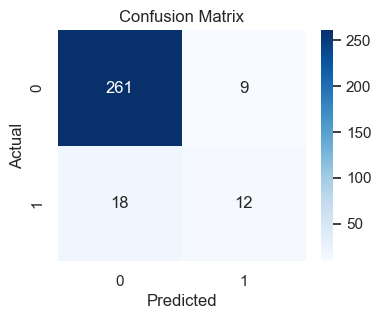

Accuracy: 0.9100
Precision: 0.5714
Recall: 0.4000


In [10]:
acc = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c)
rec = recall_score(y_test_c, y_pred_c)

cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")

### 5. F1 Score
The F1 Score is the weighted average (harmonic mean) of Precision and Recall.

$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

- **Advantages:** Better for imbalanced datasets as it balances Precision and Recall.
- **Disadvantages:** Less intuitive than accuracy; treats precision and recall as equally important.

In [4]:
f1 = f1_score(y_test_c, y_pred_c)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4706


### 4. ROC Curve and AUC
**Definition:** ROC plots True Positive Rate vs False Positive Rate at various thresholds. AUC is the area under this curve.
- **Pros:** Threshold-independent; measures model's ranking ability.
- **Cons:** Can be overly optimistic on highly imbalanced datasets.

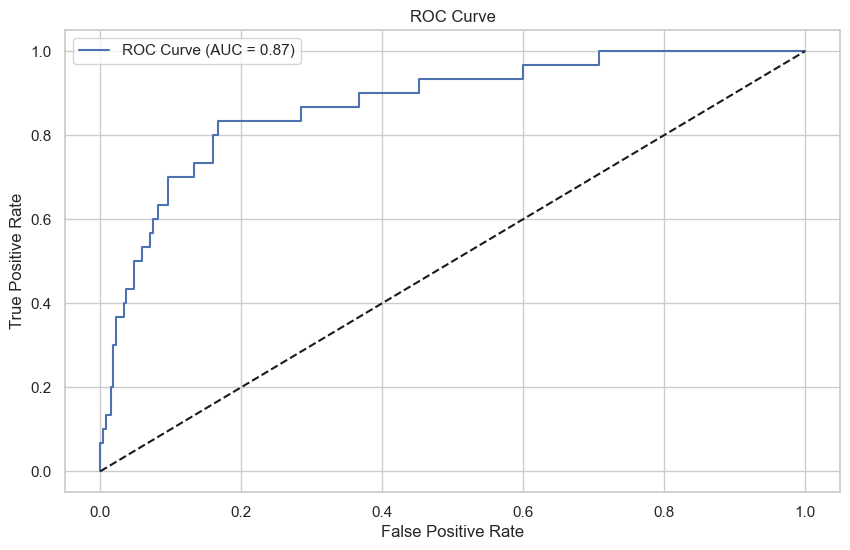

In [5]:
fpr, tpr, thresholds = roc_curve(y_test_c, y_prob_c)
auc = roc_auc_score(y_test_c, y_prob_c)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 6. Log Loss
Log Loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1.

- **Advantages:** Penalizes confident wrong predictions heavily.
- **Disadvantages:** Harder to interpret than simple counts.

In [6]:
loss = log_loss(y_test_c, y_prob_c)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.2390


## Part 2: Regression Metrics

We will use a regression dataset with some synthetic outliers.

In [7]:
# Generate regression data
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)
y_pred_r = reg_model.predict(X_test_r)

# Add an outlier to test sensitivity
y_test_r_outlier = y_test_r.copy()
y_test_r_outlier[0] += 500

### 1. Mean Absolute Error (MAE)
Average of the absolute differences between predicted and actual values.
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
- **Advantages:** Robust to outliers; same units as the target.
- **Disadvantages:** Not differentiable at zero (harder for some optimization algorithms).

### 2. Mean Squared Error (MSE)
Average of the squared differences between predicted and actual values.
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- **Advantages:** Differentiable; useful for mathematical optimization.
- **Disadvantages:** Heavily penalizes outliers; units are squared.

### 3. Root Mean Squared Error (RMSE)
Square root of MSE.
$$\text{RMSE} = \sqrt{\text{MSE}}$$
- **Advantages:** Same units as target; penalizes large errors.
- **Disadvantages:** Still sensitive to outliers.

### 4. R-squared ($R^2$)
Proportion of variance in the dependent variable that is predictable from the independent variables.
$$\text{R}^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$
- **Advantages:** Scale-independent (0 to 1 range usually).
- **Disadvantages:** Doesn't indicate if the model is biased; adding more variables always increases $R^2$ (hence Adjusted $R^2$ is often used).

In [8]:
def compare_reg_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {label} ---")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")

compare_reg_metrics(y_test_r, y_pred_r, "Normal Data")
compare_reg_metrics(y_test_r_outlier, y_pred_r, "Data with Outlier")

--- Normal Data ---
MAE: 8.15, MSE: 101.01, RMSE: 10.05, R2: 0.97

--- Data with Outlier ---
MAE: 11.44, MSE: 1746.65, RMSE: 41.79, R2: 0.69



## Part 3: Final Comparison

Let's compare different models on the same imbalanced classification task to see how metrics help us choose the best one.

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Always Negative (Baseline)": None
}

results = []

for name, model in models.items():
    if model is not None:
        model.fit(X_train_c, y_train_c)
        preds = model.predict(X_test_c)
        probs = model.predict_proba(X_test_c)[:, 1]
    else:
        preds = np.zeros_like(y_test_c)
        probs = np.zeros_like(y_test_c)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_c, preds),
        "Precision": precision_score(y_test_c, preds, zero_division=0),
        "Recall": recall_score(y_test_c, preds),
        "F1 Score": f1_score(y_test_c, preds),
        "AUC": roc_auc_score(y_test_c, probs),
        # "MAE": mean_absolute_error(y_test_c, preds),
        # "MSE": mean_squared_error(y_test_c, preds),
        # "RMSE": np.sqrt(mean_squared_error(y_test_c, preds)),
        # "R2": r2_score(y_test_c, preds),
    })

df_results = pd.DataFrame(results)
print(df_results)

                        Model  Accuracy  Precision  Recall  F1 Score       AUC
0         Logistic Regression      0.91   0.571429     0.4  0.470588  0.872840
1               Random Forest      0.94   0.833333     0.5  0.625000  0.885185
2  Always Negative (Baseline)      0.90   0.000000     0.0  0.000000  0.500000


## Summary Table

| Metric | Type | Best Used When... | Key Weakness |
| :--- | :--- | :--- | :--- |
| **Accuracy** | Classification | Classes are balanced | Misleading for imbalanced data |
| **Precision** | Classification | False Positives are costly | Ignores False Negatives |
| **Recall** | Classification | False Negatives are costly | Ignores False Positives |
| **F1 Score** | Classification | Balance is needed on imbalanced data | Harder to interpret |
| **MAE** | Regression | Outliers should not be over-penalized | Not differentiable at zero |
| **MSE/RMSE** | Regression | Large errors are particularly bad | Very sensitive to outliers |
| **R-squared** | Regression | Comparing models across different scales | Doesn't show bias |

### Conclusion
As seen in the table above, the **Always Negative** baseline has high accuracy but zero recall and F1 score. This demonstrates why we must look beyond accuracy, especially in real-world scenarios like fraud detection or medical diagnosis where the positive class is rare but important.